In [2]:
# Imports for this article
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Read in TN middle school dataset from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Essential%20Statistics/middle_tn_schools.csv')

In [3]:
df.to_csv("tennese_schools.csv")

In [4]:
df.head()

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 15 columns):
name                   347 non-null object
school_rating          347 non-null float64
size                   347 non-null float64
reduced_lunch          347 non-null float64
state_percentile_16    347 non-null float64
state_percentile_15    341 non-null float64
stu_teach_ratio        347 non-null float64
school_type            347 non-null object
avg_score_15           341 non-null float64
avg_score_16           347 non-null float64
full_time_teachers     347 non-null float64
percent_black          347 non-null float64
percent_white          347 non-null float64
percent_asian          347 non-null float64
percent_hispanic       347 non-null float64
dtypes: float64(13), object(2)
memory usage: 40.7+ KB


In [6]:
df.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


In [7]:
df[['reduced_lunch', 'school_rating']].groupby(['school_rating']).describe()

reduced_lunch                                                  \
                      count       mean        std   min    25%   50%    75%   
school_rating                                                                 
0.0                    43.0  83.581395   8.813498  53.0  79.50  86.0  90.00   
1.0                    40.0  74.950000  11.644191  53.0  65.00  74.5  84.25   
2.0                    44.0  64.272727  11.956051  37.0  54.75  62.5  74.00   
3.0                    56.0  50.285714  13.550866  24.0  41.00  48.5  63.00   
4.0                    86.0  41.000000  16.681092   4.0  30.00  41.5  50.00   
5.0                    78.0  21.602564  17.651268   2.0   8.00  19.0  29.75   

                     
                max  
school_rating        
0.0            98.0  
1.0            98.0  
2.0            88.0  
3.0            78.0  
4.0            87.0  
5.0            87.0

In [8]:
df[['reduced_lunch', 'school_rating']].corr()

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


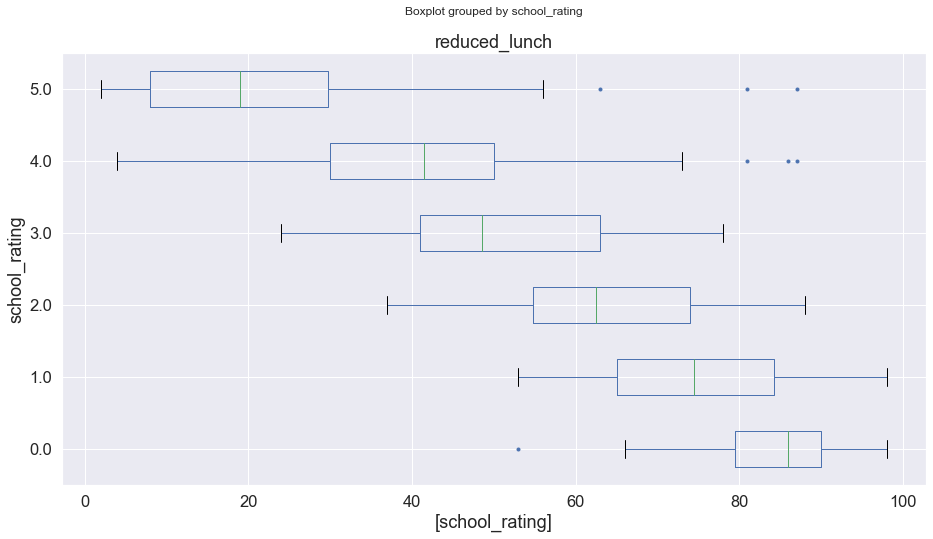

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylabel('school_rating')
# boxplot with only these two variables
_ = df[['reduced_lunch', 'school_rating']].boxplot(by='school_rating', figsize=(15,8), vert=False, sym='b.', ax=ax)

## Chart/Graphs/Plots/visualization
#### Skewness (Histogram) - Positively - Right side
                       Negitively - Left side
                       Normalized (Bell shaped)
                       Data Spread - Variation. Standard deviation.
#### Line graph - Data should be collected over time. Time series. Trend. Decompose a time series into various components. 
#### Scatter plot - Trend and data spread.
#### Pie chart - Show the distribution of categrorical variables. Less than 10. e.g gender, school rating,..
#### Bar/column Chart - show distribution of both categroical(many) and continous.                 

C:\Users\edwin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


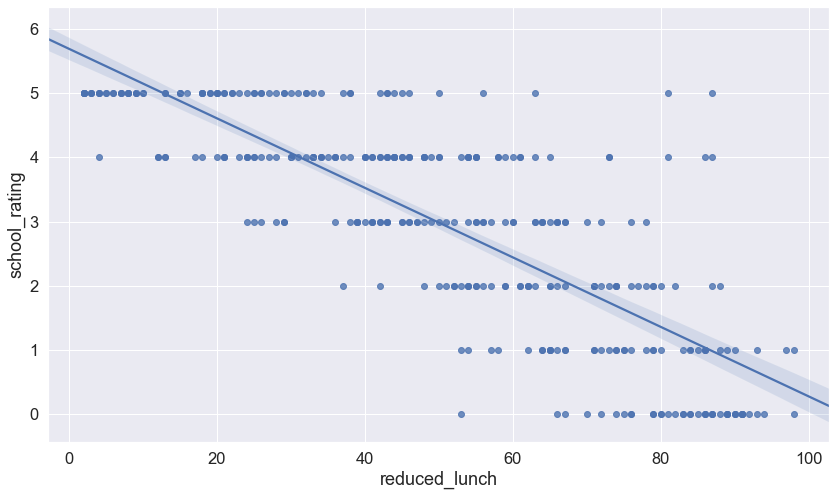

In [32]:
plt.figure(figsize=(14,8)) # set the size of the graph
_ = sns.regplot(data=df, x=df['reduced_lunch'], y=df['school_rating'])

In [39]:
corr.columns.values

array(['school_rating', 'size', 'reduced_lunch', 'state_percentile_16',
       'state_percentile_15', 'stu_teach_ratio', 'avg_score_15',
       'avg_score_16', 'full_time_teachers', 'percent_black',
       'percent_white', 'percent_asian', 'percent_hispanic'], dtype=object)

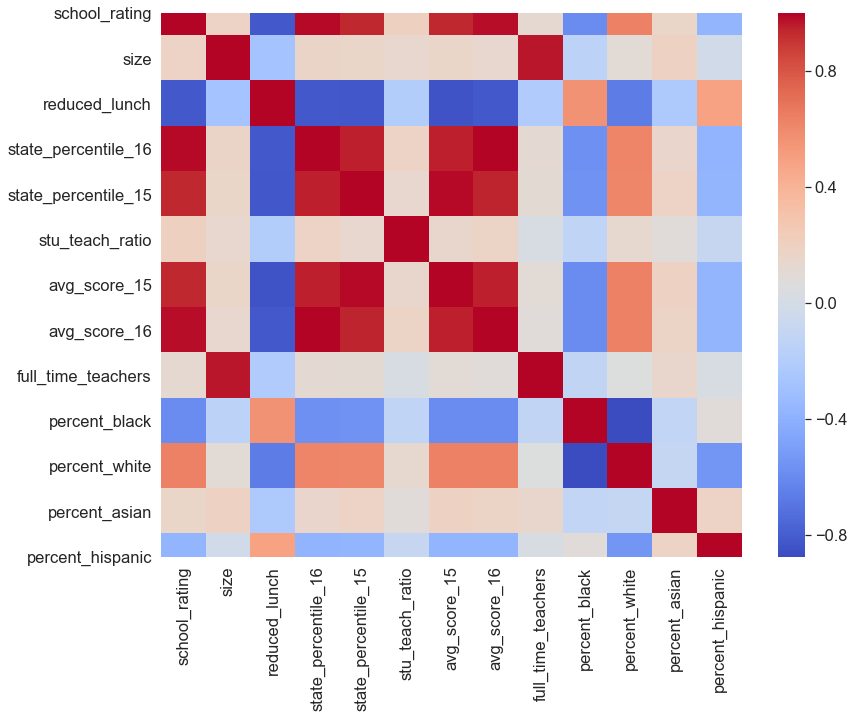

In [44]:
# create tabular correlation matrix
corr = df.corr()
_, ax = plt.subplots(figsize=(13,10))
# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

In [45]:
lst = [34,56,34.45, 70,63,78,32,55]

In [46]:
def grade(x):
    if x > 'English':
        return 5
    elif x > 'French':
        return 4
    else:
        return 2

In [ ]:
lst['grade'] = lst['Marks'].apply(grade)